In [2]:
import os
os.environ['PROJ_LIB'] = '/home/jlee/.conda/envs/mmc_sgp/share/proj'
# os.environ['PROJ_LIB'] = '/nopt/nrel/apps/anaconda/mini_py37_4.8.3/bin/python'

In [26]:
import sys
print(sys.executable)
print(sys.version)

/home/jlee/.conda/envs/mmc_sgp/bin/python
3.8.6 | packaged by conda-forge | (default, Jan 25 2021, 23:21:18) 
[GCC 9.3.0]


In [19]:
import os
os.environ['PROJ_LIB'] = '/home/jlee/.conda/envs/mmc_sgp/share/proj'

import wrf
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
import numpy as np

In [3]:
file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/auxout/'+'mmc_d04_2018-08-05_22:00:00'

wrf_single = Dataset(file, 'r')

In [4]:
wrf_single

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    TITLE:  OUTPUT FROM WRF V4.2.1 MODEL
    START_DATE: 2018-08-05_15:00:00
    WEST-EAST_GRID_DIMENSION: 201
    SOUTH-NORTH_GRID_DIMENSION: 331
    BOTTOM-TOP_GRID_DIMENSION: 109
    DX: 40.0
    DY: 40.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    GRIDTYPE: C
    DIFF_OPT: 2
    KM_OPT: 2
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 28
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 5
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 0
    CU_PHYSICS: 0
    SF_LAKE_PHYSICS: 0
    USE_BATHYMETRY: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0
    SGFDDA_INTERVAL_M: 0
    SGFDDA_END_H: 0
    HYPSOMETRIC_OPT: 2
    US

In [15]:
lh = wrf.getvar(wrf_single, 'LH')

In [6]:
tk = wrf.getvar(wrf_single, 'tk', timeidx=wrf.ALL_TIMES)

In [7]:
lats, lons = wrf.latlon_coords(lh)

In [8]:
lh

<xarray.DataArray 'LH' (Time: 6, south_north: 330, west_east: 200)>
array([[[100.08931 , 100.60693 , 101.41757 , ..., 122.073944,
         121.502975, 120.871185],
        [100.02601 , 100.14871 , 100.95103 , ..., 122.32097 ,
         121.70131 , 121.28672 ],
        [ 99.87836 , 100.218994, 100.95767 , ..., 122.547874,
         122.04918 , 121.67897 ],
        ...,
        [142.21944 , 140.09225 , 138.95943 , ...,  89.44566 ,
          89.6289  ,  90.242355],
        [143.27109 , 141.09857 , 140.15443 , ...,  90.161476,
          90.218185,  90.76178 ],
        [144.3161  , 142.45421 , 141.48114 , ...,  91.04467 ,
          91.1091  ,  91.34456 ]],

       [[ 93.35296 ,  93.74599 ,  94.263466, ..., 115.020004,
         113.6088  , 112.15831 ],
        [ 93.352104,  93.5088  ,  93.9795  , ..., 114.715385,
         113.31664 , 112.169304],
        [ 93.35377 ,  93.59408 ,  93.984695, ..., 114.69707 ,
         113.3198  , 112.214195],
...
        [124.978264, 124.81471 , 124.12585 , ...,  85.64271 ,
          85.68996 ,  85.886536],
        [125.67452 , 126.40844 , 124.63094 , ...,  86.18231 ,
          86.12479 ,  86.27248 ],
        [124.86305 , 125.70908 , 124.883644, ...,  86.85371 ,
          86.74907 ,  86.704956]],

       [[ 84.44957 ,  84.754135,  86.195435, ...,  99.77813 ,
          99.413445,  99.31029 ],
        [ 84.624084,  84.73054 ,  85.67017 , ..., 100.031906,
          99.64726 ,  99.59497 ],
        [ 84.60939 ,  85.369064,  85.78237 , ...,  99.95687 ,
          99.84661 ,  99.91243 ],
        ...,
        [121.91862 , 120.34479 , 119.61452 , ...,  81.81636 ,
          81.88723 ,  82.09776 ],
        [122.50549 , 118.01531 , 117.16387 , ...,  82.327   ,
          82.30734 ,  82.534454],
        [122.96584 , 118.914   , 117.97065 , ...,  82.976906,
          82.91625 ,  82.97856 ]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT     (south_north, west_east) float32 36.51 36.51 36.51 ... 36.63 36.63
    XTIME    (Time) float32 2.04e+03 2.05e+03 2.06e+03 ... 2.08e+03 2.09e+03
  * Time     (Time) datetime64[ns] 2018-08-05T22:00:00 ... 2018-08-05T22:50:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATENT HEAT FLUX AT THE SURFACE
    units:        W m-2
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [68]:
lh.description

'LATENT HEAT FLUX AT THE SURFACE'

In [16]:
bm = wrf.get_basemap(lh)

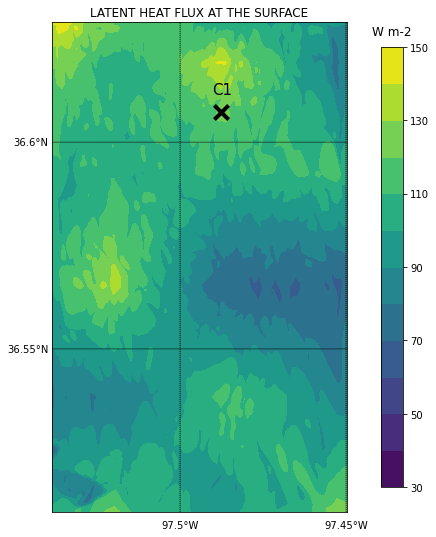

In [100]:
# Create a figure
fig = plt.figure(figsize=(12, 9))

# Add geographic outlines
# bm.drawcoastlines(linewidth=0.25)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)

bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

# Convert the lats and lons to x and y.  Make sure you convert the lats and
# lons to numpy arrays via to_np, or basemap crashes with an undefined
# RuntimeError.
x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

# Draw the contours and filled contours
# bm.contour(x, y, wrf.to_np(lh), 10, colors="black")
bm.contourf(x, y, wrf.to_np(lh), 10, cmap=get_cmap('viridis'))

# Add a color bar
clb = plt.colorbar(shrink=0.9)
clb.ax.set_title(lh.units, pad=12)

c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
# bm.plot(c1x, c1y, 'kx', markersize=10, linewidth=100.)
bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
# bm.plot(c1x, c1y, 'kx', markersize=10, linewidth=100.)
plt.annotate('C1', xy=(c1x, c1y), size=15)

plt.title(lh.description)

plt.show()